In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import os
from functools import *
import sklearn as sk
import pickle
import time
# from numba import jit

In [2]:
X = pickle.load(open('X','rb'))
y = pickle.load(open('y','rb'))

# nas = ~np.isnan(X).any(axis=1)

# X = X[nas]
# y = y[nas]

# from sklearn import preprocessing
# X = preprocessing.scale(X)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.4,random_state=2)
from sklearn.utils import compute_sample_weight
sw = compute_sample_weight('balanced',y_train)

In [4]:
X.shape

(2962, 400, 78)

In [5]:
pd.DataFrame(X[0])

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,1.032493,1.042422,1.017856,0.989410,0.994175,0.995004,0.965379,0.956407,0.999509,1.011016,...,-0.067615,0.000000e+00,0.043950,0.070941,0.054028,0.100860,0.151847,0.037316,0.135064,-0.204670
1,1.032493,1.042422,1.017856,0.989410,0.994175,0.995004,0.965379,0.956407,0.999509,1.011016,...,-0.067615,8.875709e-13,0.043950,0.070941,0.054028,0.100860,0.151847,0.037316,0.135064,-0.204670
2,1.032493,1.042422,1.017856,0.989410,0.994175,0.995004,0.965379,0.956407,0.999509,1.011016,...,-0.067615,8.904678e-13,0.043950,0.070941,0.054028,0.100860,0.151847,0.037316,0.135064,-0.204670
3,1.032493,1.042422,1.017856,0.989410,0.994175,0.995004,0.965379,0.956407,0.999509,1.011016,...,-0.067615,8.952599e-13,0.043950,0.070941,0.054028,0.100860,0.151847,0.037316,0.135064,-0.204670
4,1.032493,1.042422,1.017856,0.989410,0.994175,0.995004,0.965379,0.956407,0.999509,1.011016,...,-0.067615,9.029392e-13,0.043950,0.070941,0.054028,0.100860,0.151847,0.037316,0.135064,-0.204670
5,1.032493,1.042422,1.017856,0.989410,0.994175,0.995004,0.965379,0.956407,0.999509,1.011016,...,-0.067615,9.102060e-13,0.043950,0.070941,0.054028,0.100860,0.151847,0.037316,0.135064,-0.204670
6,1.032493,1.042422,1.017856,0.989410,0.994175,0.995004,0.965379,0.956407,0.999509,1.011016,...,-0.067615,9.194270e-13,0.043950,0.070941,0.054028,0.100860,0.151847,0.037316,0.135064,-0.204670
7,1.032493,1.042422,1.017856,0.989410,0.994175,0.995004,0.965379,0.956407,0.999509,1.011016,...,-0.067615,9.289720e-13,0.043950,0.070941,0.054028,0.100860,0.151847,0.037316,0.135064,-0.204670
8,1.032493,1.042422,1.017856,0.989410,0.994175,0.995004,0.965379,0.956407,0.999509,1.011016,...,-0.067615,9.403043e-13,0.043950,0.070941,0.054028,0.100860,0.151847,0.037316,0.135064,-0.204670
9,1.032493,1.042422,1.017856,0.989410,0.994175,0.995004,0.965379,0.956407,0.999509,1.011016,...,-0.067615,9.514598e-13,0.043950,0.070941,0.054028,0.100860,0.151847,0.037316,0.135064,-0.204670


In [3]:
len(X_train)

1777

In [4]:
len(X_test)

1185

In [5]:
from keras.models import Sequential,Model
from keras.layers import *
from keras.optimizers import Adam,SGD
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [8]:
class ModelRst:
    pass

def run_model(n_timestamps):
    X_input = []
    my_reshape = Reshape((1,n_timestamps,2))
    my_permute = Permute((2,3,1))
    my_conv1 = Conv2D(8,(10,2),activation='relu')
    my_maxpool1 = MaxPooling2D((2,1))
    my_conv2 = Conv2D(4,(10,1),activation='relu')
    my_maxpool2 = MaxPooling2D((2,1))
    my_flatten = Flatten()

    conv_lst = []
    for i in range(39):
    #     V_real = Lambda(lambda X:X[:,i],output_shape=(400,1))(X_input)
    #     V_img = Lambda(lambda X:X[:,i+39],output_shape=(400,1))(X_input)
    #     bus = merge([X_input[:,:,i],X_input[:,:,i+39]],mode='concat',concat_axis=1)
        inpt = Input(shape=(n_timestamps,2))
        X_input.append(inpt)
        bus = my_reshape(inpt)
        bus = my_permute(bus)
        conv1 = my_conv1(bus)
        pool1 = my_maxpool1(conv1)
        conv2 = my_conv2(pool1)
        pool2 = my_maxpool2(conv2)
        fl2 = my_flatten(pool2)
        conv_lst.append(fl2)

    d = concatenate(conv_lst,axis = 1)
    d = Dense(64,activation='relu')(d)
#     d = BatchNormalization()(d)
#     d = Dropout(0.5)(d)
    d = Dense(64,activation='relu')(d)
#     d = BatchNormalization()(d)
#     d = Dropout(0.5)(d)
    d = Dense(64,activation='relu')(d)
#     d = BatchNormalization()(d)
#     d = Dropout(0.5)(d)

    y_output = Dense(1, activation='sigmoid')(d)

    model = Model(inputs=X_input,outputs=y_output)
    adam = Adam()
    model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])

    # @jit
    def get_lst(X_train):
        X_train_lst = []
        for i in range(39):
            buf = np.zeros((len(X_train),n_timestamps,2))
            buf[:,:n_timestamps,0] = X_train[:,:n_timestamps,i]
            buf[:,:n_timestamps,1] = X_train[:,:n_timestamps,i+39]
            X_train_lst.append(buf)
        return X_train_lst

    history = model.fit(get_lst(X_train),y_train,epochs=50,batch_size=50,validation_data=(get_lst(X_test),y_test),
                        sample_weight=sw,
                        callbacks=[EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')],
                       )

    bt = time.perf_counter()
    # y_prd_val = model.predict(get_lst(X_val))
    y_prd_test = model.predict(get_lst(X_test))
    et = time.perf_counter()
    prd_time = (et - bt,len(X_test))

    # 
    # params = [0.1,0.3,0.5,0.7,0.9]
    # rst = []

    # for p in params:
    #     t = (y_prd_val > p).astype('int64')
    #     rst.append(f1_score(y_val,t,average='binary'))

    # plt.plot(params,rst)

    from sklearn.metrics import f1_score
    t = (y_prd_test > 0.5).astype('int64')
    f1_score(y_test,t,average='binary')

    from sklearn.metrics import roc_auc_score
    roc_auc_score(y_test,(y_prd_test > 0.5).astype('int64'),average='macro')

    from sklearn.metrics import average_precision_score
    average_precision_score(y_test,(y_prd_test > 0.5).astype('int64'),average='macro')

    from sklearn.metrics import precision_recall_curve
    precision,recall,threshold = precision_recall_curve(y_test,y_prd_test)

    from sklearn.metrics import roc_curve,auc
    fpr,tpr,thr = roc_curve(y_test,y_prd_test)
    roc_auc = auc(fpr,tpr)
    
    rst = ModelRst()
    rst.history = history.history
    rst.prd_time = prd_time
    rst.precision = precision
    rst.recall = recall
    rst.pr_thr = threshold
    rst.fpr = fpr
    rst.tpr = tpr
    rst.roc_thr = thr
    rst.roc_auc = roc_auc
    
    return (rst,model)

In [9]:
# T = [50,100,150,200,250,300,350,400]
T = [200]
for t in T:
    rst,model = run_model(t)
    print(rst)
    pickle.dump(rst,open(str(t) + '.rst','wb'))

Train on 1777 samples, validate on 1185 samples
Epoch 1/50
1777/1777 [==============================] - 1s - loss: 0.4879 - acc: 0.7333 - val_loss: 0.3191 - val_acc: 0.8532
Epoch 2/50
1777/1777 [==============================] - 2s - loss: 0.1817 - acc: 0.9285 - val_loss: 0.4906 - val_acc: 0.8076
Epoch 3/50
1777/1777 [==============================] - 2s - loss: 0.1322 - acc: 0.9488 - val_loss: 0.0690 - val_acc: 0.9705
Epoch 4/50
1777/1777 [==============================] - 2s - loss: 0.0831 - acc: 0.9662 - val_loss: 0.1352 - val_acc: 0.9409
Epoch 5/50
1777/1777 [==============================] - 2s - loss: 0.0685 - acc: 0.9713 - val_loss: 0.0322 - val_acc: 0.9882
Epoch 6/50
1777/1777 [==============================] - 2s - loss: 0.0496 - acc: 0.9792 - val_loss: 0.0393 - val_acc: 0.9840
Epoch 7/50
1777/1777 [==============================] - 2s - loss: 0.0451 - acc: 0.9837 - val_loss: 0.0465 - val_acc: 0.9823
Epoch 8/50
1777/1777 [==============================] - 2s - loss: 0.0612 - a

In [8]:
model.get_config()

{'input_layers': [['input_274', 0, 0],
  ['input_275', 0, 0],
  ['input_276', 0, 0],
  ['input_277', 0, 0],
  ['input_278', 0, 0],
  ['input_279', 0, 0],
  ['input_280', 0, 0],
  ['input_281', 0, 0],
  ['input_282', 0, 0],
  ['input_283', 0, 0],
  ['input_284', 0, 0],
  ['input_285', 0, 0],
  ['input_286', 0, 0],
  ['input_287', 0, 0],
  ['input_288', 0, 0],
  ['input_289', 0, 0],
  ['input_290', 0, 0],
  ['input_291', 0, 0],
  ['input_292', 0, 0],
  ['input_293', 0, 0],
  ['input_294', 0, 0],
  ['input_295', 0, 0],
  ['input_296', 0, 0],
  ['input_297', 0, 0],
  ['input_298', 0, 0],
  ['input_299', 0, 0],
  ['input_300', 0, 0],
  ['input_301', 0, 0],
  ['input_302', 0, 0],
  ['input_303', 0, 0],
  ['input_304', 0, 0],
  ['input_305', 0, 0],
  ['input_306', 0, 0],
  ['input_307', 0, 0],
  ['input_308', 0, 0],
  ['input_309', 0, 0],
  ['input_310', 0, 0],
  ['input_311', 0, 0],
  ['input_312', 0, 0]],
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 400

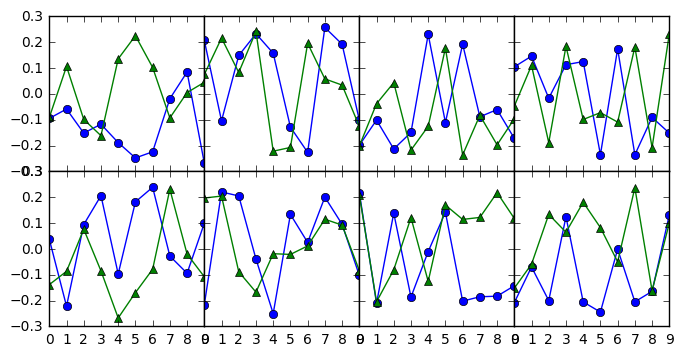

In [12]:
c1 = model.get_layer('convolution2d_15')
w,b = c1.get_weights()

n_kernels = w.shape[-1]

f,axs = plt.subplots(n_kernels//4,4,sharex=True,sharey=True,figsize=(8,2 * n_kernels // 4))
k = 0
for i in range(n_kernels//4):
    for j in range(4):
        ax = axs[i,j]
        ax.plot(w[:,0,0,k],'o-')
        ax.plot(w[:,1,0,k],'^-')
        k += 1
f.subplots_adjust(wspace=0,hspace=0)


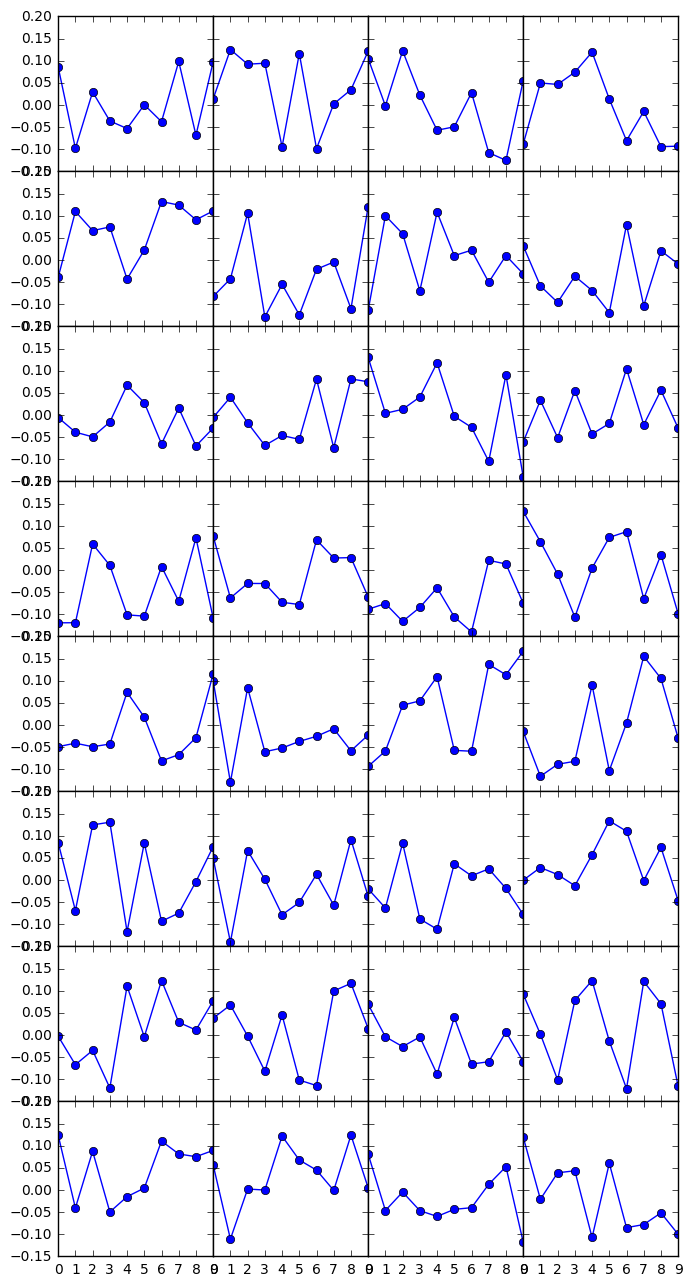

In [13]:
c1 = model.get_layer('convolution2d_16')
w,b = c1.get_weights()

n_kernels = w.shape[-1] * w.shape[-2]

f,axs = plt.subplots(w.shape[2],w.shape[3],figsize=(w.shape[2],w.shape[3] * 4),sharex=True,sharey=True)
k = 0
for i in range(w.shape[2]):
    for j in range(w.shape[3]):
        axs[i,j].plot(w[:,0,i,j],'o-')
        k += 1

f.subplots_adjust(wspace=0,hspace=0)